# Programming For Data Analysis Project 2021
## A Simulation of Risk Factors for Type2 Diabetes in Ireland
### Introduction
The objective of this project is to simulate a dataset of risks of developing Type2 Diabetes in Ireland using a set of generally accepted risk factors that will be described in the project. 

Using real and known risk factors for developing the condition I will use these to synthesise a data set using a simulated population profile and apply these risk factors to that population. Simulating data is a useful way of modelling real world phenomenon without having to carry out costly physical testing or surveying. Populations of varying sizes can be simulated and likely outcomes predicted. 

#### What is Diabetes. 
- Diabetes, or Diabetes Mellitus to give it its full name, is a condition caused by an insufficient supply of insulin from the pancreas. As individuals consume foods and liquids the pancreas regulates the supply of insulin to ensure that the resulting sugar in the blood is allowed to get into muscles and cells. This is essential for normal bodily functions. When the pancreas cannot produce any or sufficient insulin the body cannot process sugar in the bloodstream to make it available to other body organs, cells and the brain. The resulting build up of excess sugar in the blood has potentially serious and long term health impacts if not recognised and treated. 

- Diabetes across the globe is one of the great health issues of our time, it was there long before Covid and in all likelihood will be there long after. It is estimated that there are in the region of 450m people that have diabetes worldwide, with by far the greater percentage (~90%) having Type2. It consumes globally in excess of 750mUSD of health spend annually with the US alone accounting for 40% of this. Overall costs associated with the disorder are in the order of trillionsUSD. 

![[Diabetes Costs]](https://els-jbs-prod-cdn.jbs.elsevierhealth.com/cms/attachment/6b40d444-3dbe-4511-8432-2f944ea240a5/gr3.jpg)

- It is interesting to note, on a mean annual expenditure per head, Ireland is ranked at number 6 in the world, not at all a good position. Both the incidence and costs associated with diabetes are trending substantially upwards with projections indicating a rise to ~650m people worldwide by 2040 with pro-rata increases expected in Ireland. 


There are three main classifications of diabetes:
1. Type 1 
   - It is unclear exactly what triggers Type 1 diabetes, there may be genetic and/or environmental factors. It is characterised by the immune system attacking and destroying the cells in the pancreas that produce insulin. It is not known exactly what triggers this autoimmune response to insulin cells. 
2. Type 2
   - This type of diabetes, by far the most prevalent, is characterised by a reduction in the ability of cells to respond to insulin, potentially leading to a reduction in the amount of insulin produced by the pancreas. It is often, but not strictly, a disease of later life and there are a clear set of risk factors that can predispose to developing this disorder. It affects men and women equally. 
3. Gestational 
   - This type is specific to pregnancy and develops in women with no previous history of diabetes. It is unclear why it arises and it generally resolves post birth. 

For the purpose of this project I will only be considering Type 2 Diabetes, the reason being there are some very clear risk factors that can predispose for developing the condition, unlike Type 1 where it is unknown and Gestational where it is specifically preganancy related. From here on, unless specifically stated, the term "diabetes" as used in the project is taken to refer to type2 diabetes.  

As stated above the objective is to assess these risk factors on a statistical basis and from that create a simulation based on synthesised data. This will be carried out in Python using the numpy.random package as well as pandas and pyplot. The project will be created in a Jupyter notebook and it and associated files will be hosted on Github.  

***

### Project approach.
The project will be carried out in the following stages:
- Online research of primary risk factors that can be used for the simulation.
- From the online research translate the risk factors into tables using numpy.
- Combine the risk factor data to produce an overall data set where the output is an overall risk factor of developing type 2 diabetes, where 0 is no or very low risk and 1 or greater is a very high risk. It should be borne in mind that the risk factor is just that, i.e. an indication of the risk of developing diabetes, there is no certainty that a score of 0 means no possibility of developing the disease or a score of 1 means that it is certain. 
- Plot the outcomes and comment on the findings. 

#### Stage 1 - Online Research.
This section will review available data related to the generally accepted risk factors associated with diabetes. Given the scale, costs, health and social impacts of diabetes globally, and here in Ireland, it is not surprising there is an enormous amount of resesarch and data available. The challenge here is to find and assess supporting data that is specific to an Ireland context and to that end I have largely restricted the research to this area. However where necessary I will use available information not specific to Ireland, in particular as it relates to disease specific data as against its geographic context. 

###### Diabetes Risk Factors.

The diabetes Ireland website is a valuable source of information and data related to the disease in Ireland. According to the data there are approximately 200,000 people with the condition and of these about 30,000 are undiagnosed. There may also be up to 150,000 in what is termed a pre-diabetes stage, i.e. people who have blood sugar levels higher than normal but have not yet progressed to developing diabetes. Diabetes is termed a "silent killer" as many can have the condition but not have any recognisable symptoms. If left undiagnosed and untreated there can be serious health outcomes. 

Primary Risk Factors. 
Below is the list of risk factors that I will be looking at to create the overall risk factor data set. While there are quite a few other risk factors, having reviewed a number of online publications these 4 are common across all and are deemed to be amongst the highest contributors to risk. 
- Age. The risk of developing diabetes increases with age, increasingly significantly for those over 40-45. Increasing age is generally associated with weight gain and less exercise, two other significant risk factors. Younger individuals can also develop the condition. There is no zero risk age and at birth the lifetime risk of developing the condition is 30%. 
  - For the project I will be segmenting (binning) the data into 6 age groups, 15-24, 25-34, 35-44, 45-54, 55-64, 65-74.
- Weight. This is a primary risk factor and in the developed world the the growth in diabetes is highly reflective of increasing weight in populations. Body cells become more resistant to insulin the greater the amount of fatty tissue in the body. 
  - For this risk factor I will be using the Body Mass Index (BMI) classification where BMI is calculated as BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. 
- Physical Activity. Exercise is an important aspect of diabetes prevention. It helps to control weight and helps cells use up sugar in the blood. At least 30 minutes a day is recommended. On the flip side a lack of exercise has the opposite effect. 
- Smoking. Smoking is a high risk factor as chemicals in cigarettes interfere with normal cell functions and can decrease the effectivity of insulin in the body. According to the US FDA smokers have a 30% to 40% higher risk of developing diabetes than nonsmokers.  

***

#### Data for Risk Factors

Having identified and described the risk factors to be used in the project the next stage is to look at the available data associated with these in order to quantify the risk factors to be used in the synthesised data set. 

Before getting to that the section below on Population will create a synthesised population per the age segments described above. 

##### Population

The objective of this section is to generate a synthesised population of 1000 individuals by age category. I am not splitting by male/female as in many cases risk factors are marginal between the two. 

The most reliable source of data for estimates of population in Ireland is the Central Statistics Office (CSO) www.cso.ie. For the pupose of the project I am using the most recent data as of April 2021 which gives the overall population in the country of 5.01m. For the purpose of the project I have used Table 1.8 from this report which provides a complete breakdown of the population by age category from 2015 to 2021. The 2021 data will be used and is stored in the Datasets folder as IrelandPop_AgeCat.csv. Th epurpose of doing thsi is to have a look at the general population profile by age group. 

The data table is shown below. 

In [1]:
# Import the libraries needed for the project. 
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read in the Ireland population data set summary tken from the CSO data. 
# I have split this out by the age categories defined for the project. 
df = pd.read_csv("./Datasets/IrelandPop_AgeCat.csv")
#df = df.set_index('Category')
df

,Category,Yr2015,Yr2016,Yr2017,Yr2018,Yr2019,Yr2020,Yr2021
0,15-24,571.6,574.7,584.8,605.5,618.0,631.1,635.6
1,25-34,667.9,657.0,640.3,626.9,620.0,616.2,608.8
2,25-44,732.8,744.6,757.7,768.2,776.9,780.2,777.8
3,45-54,612.2,623.3,636.4,647.9,661.6,674.5,688.4
4,55-64,491.4,504.7,516.3,526.4,539.7,551.6,563.1
5,65-74,354.4,367.9,380.5,393.5,404.1,415.0,423.5


In [3]:
# Getting just the 2021 data.
df_21 = df[['Category','Yr2021']]
df_21

,Category,Yr2021
0,15-24,635.6
1,25-34,608.8
2,25-44,777.8
3,45-54,688.4
4,55-64,563.1
5,65-74,423.5


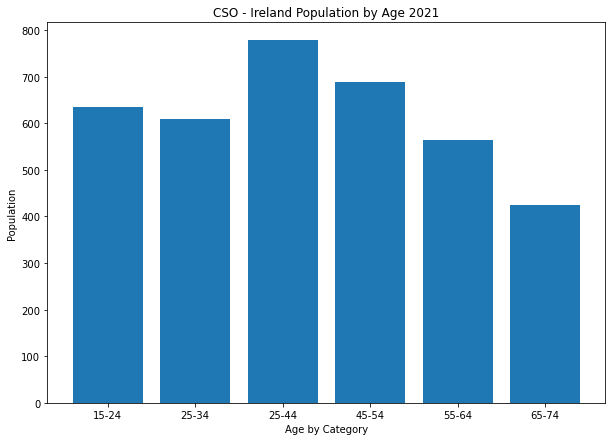

In [4]:
# Having a look at how the population profile by age category.
age_cat=df_21['Category']
age_pop=df_21['Yr2021']
plt.figure(figsize=(10,7))
plt.title('CSO - Ireland Population by Age 2021')
plt.xlabel('Age by Category')
plt.ylabel('Population')
plt.bar(age_cat,age_pop)
plt.show()

In [5]:
# Code to produce a synthesised population for 1000 individulals between 15 and 75 years old. 
# The randint() function produces a set of integers from the discrete uniform distribution.
# While not exactly matching the real population profile it will be sufficient for the project.  

# fixing the seed so output remains consistent. 
random.seed(1)
pop=np.random.randint(15, 75, 1000)
popdf = pd.DataFrame(pop, columns=['Age'])
popdf

,Age
0,52
1,58
2,27
3,23
4,24
...,...
995,58
996,61
997,42
998,48


In [6]:
# This code takes the synthesised population of 1000 and splits out by the age categories specified for the project. 
conditions=[(popdf['Age']>=15) & (popdf['Age']<=24),
           (popdf['Age']>24) & (popdf['Age']<=34),
            (popdf['Age']>34) & (popdf['Age']<=44),
           (popdf['Age']>44) & (popdf['Age']<=54),
           (popdf['Age']>54) & (popdf['Age']<=64),
           (popdf['Age']>64) & (popdf['Age']<=74)]

values = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74']

popdf['Category']= np.select(conditions,values)
popdf.head(6)

,Age,Category
0,52,45-54
1,58,55-64
2,27,25-34
3,23,15-24
4,24,15-24
5,26,25-34


<AxesSubplot:ylabel='Count'>

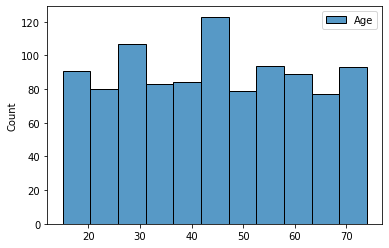

In [7]:
# Have a quick look at the 1000 population. 
sns.histplot(popdf)

***

#### Risk 1 - Age Related Risk

In general middle age and older individuals have a higher risk of developing the condition. This can partly be explained by the tendency of older adults to become less physically active and to gain weight. In a Dutch study by Lighart et al, they calculated the risk of developing diabetes at age 45 to be 31.3%. 

For the purpose of the project I am using the following age related risk factors for diabetes development.

- 15-24: 10%
- 25-34: 20%
- 35-44: 30%
- 45-54: 30%
- 55-64: 40%
- 65-74: 45%

#### Risk 2 - Smoking

The US Centers for Disease Control (CDC) estimates that smoking not only increases increases the likelihood of developing diabetes by 30%-40% it also has a negative impact on those already with the condition. The chemicals in cigarettes, mainly nicotine, have an impact on normal cell function that makes it difficult to respond to insulin and normal absorbation of blood sugars. These chemicals also cause cell inflammation further increasing resistance to insulin. Over a prolonged period this can lead to reduced production of insulin and the increased risk of diabetes. 

In an Ireland context the overall prevalence of smoking has reduced significantly over the last 20 years. The healthy Ireland survey of 2019 indicated that overall smoking rates for adults fell from 23% in 2015 to 17% in 2019. However rates vary by age group, ranging from 10% in the 65+ to 22% in the 25-34 group.  

From the table below extracted from Trends in Smoking Prevalence and Tobacco Consumption it is clear how overall % of smokers has declined over the last 20 years by age group. 

![Smoking Ireland](./Datasets/Smoking_Ireland.png)

For the purpose of this project I will be using the 2019 figures by age group to estimate numbers of smokers in my synthesised dataset of population.

- 15-24: 18%
- 25-34: 22%
- 35-44: 21%
- 45-54: 19%
- 55-64: 17%
- 65-74: 10%


#### Risk 3 - Physical Activity Risk

The benefits of physical activity can never be understated. There are innumerable studies demonstrating the benefits of physical activity both in reducing the risk of developing diabetes and of improving outcomes for those with diabetes. Among the many benefits it can help with controlling/losing weight, better management of blood sugar levels, blood pressure and circulation. At a minimum it it is recommended that individuals partake in some physical activity for at least 30 minutes per day. All forms of exercise are good, i.e. aerobic, resistance or both. 

Unfortunately across the developed world populations are increasingly leading more sedentary lives which in turn feeds into the trends of increasing weight and the resulting risks of developing diabetes. It is estimated that the risk of developing diabetes from insufficient activity is increased by 50%. In the US alone it is estimated that 75% of adults do not get sufficient physical activity. In an Ireland context, having reviewed the Healty Ireland Report of 2019 it is estmated that overall only 46% of adults reach the recommended levels of activity. 

For the purpose of this project I am using the following as indicators of % of the age bracket reaching the required levels of activity:
These are taken from Healthy Ireland Summary Report 2019, figures are rounded to facilitate calculations. 

- 15-24: 60%
- 25-34: 55%
- 35-44: 50%
- 45-54: 45%
- 55-64: 35%
- 65-74: 30%


***

#### Risk 4 - Weight Related Risk
Weight is a primary risk factor for developing Diabetes. Excess fatty tissue interferes with the cells ability to absorb insulin and contributes to reduced insulin output from the pancreas. All of the research indicates a clear and causal relationship between the increasing weight trends in populations and the increased incidence of diabetes, in particuar across the developed world, the US being a prime example. The trends in Ireland show a similar profile, in fact the most recent study by Eurostat indicates that Ireland has the second highest rate of obesity in the EU with 26% of the adult population classified as obese (up from 14% in a 2014 study), and overall 56% of the adult population classified as overweight. 

To quantify weight as a risk factor I am using the well known Body Mass Index (BMI) as the primary indicator of weight category. While not perfect by any means BMI is nonetheless a good indicator of weight status in individuals It is easy to measure, being weight(kg)/height(m2) and and is generally defined as follows:
- BMI is less than 18.5, it falls within the underweight range.
- BMI is 18.5 to <25, it falls within the healthy weight range
- BMI is 25.0 to <30, it falls within the overweight range.
- BMI is 30.0 or higher, it falls within the obesity range.

Note that obestity of further subdivided into following classifications:
- Class 1: BMI of 30 to < 35
- Class 2: BMI of 35 to < 40
- Class 3: BMI of 40 or higher.

From the 2019 Healthy Ireland Report the Irish population profile overall is 37% have a normal weight, 37% are overwieght and 23% are obese. (* Note I have excluded those classified as underweight from the table.) 

For the purpose of the project I will be using the following BMI Profiles for the age groups:

![BMI Ireland](./Datasets/BMI_Ireland.png)

A 2007 study, Effect of BMI on Lifetime Risk for Diabetes in in the US (Narayan et al) demonstrated the association between BMI and risk of developing diabetes, as shown in the summary table below. Overall they concluded that there is a very strong association between both but interestingly the impact of BMI diminishes with age. 

Note the table shown just a portion of the overall summary table from the report as it is more relevant to an Irish population profile. 

![BMI Risk](./Datasets/BMI_Risk.png)


***

#### Generating the Data Sets
Having looked at some of the specifics related to the four risk factors the next step is to generate data related to these against the simulated 1000 population data. 

In this section the risk data sets are generated on the population based on the risk profiles described above. 

#### Risk 1 - *Age*

In [8]:
# For the 1000 individuals this code produces a normal distribution of age related risk % based on the age categories above. 
def AgeRisk(popdf):
    if popdf['Age']>=15 and popdf['Age']<=24:return round(np.random.normal(.1,0.01),2)
    elif popdf['Age']>24 and popdf['Age']<=34:return round(np.random.normal(.2,0.02),2)
    elif popdf['Age']>34 and popdf['Age']<=44:return round(np.random.normal(.3,0.03),2)
    elif popdf['Age']>44 and popdf['Age']<=54:return round(np.random.normal(.3,0.04),2)
    elif popdf['Age']>54 and popdf['Age']<=64:return round(np.random.normal(.4,0.05),2)
    elif popdf['Age']>64:return round(np.random.normal(.45,0.06),2)
    else: return 0
popdf['AgeRisk']= popdf.apply(AgeRisk, axis=1)
popdfage = popdf

In [9]:
# Summarise the Age risk profile by age category.
popdfage.groupby('Category')['AgeRisk'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
15-24,153.0,0.099869,0.010130,0.07,0.09,0.10,0.110,0.12
25-34,175.0,0.197714,0.020354,0.15,0.19,0.20,0.210,0.24
35-44,178.0,0.301966,0.030347,0.23,0.28,0.30,0.320,0.39
45-54,183.0,0.299344,0.040703,0.20,0.27,0.30,0.325,0.41
55-64,156.0,0.402628,0.050381,0.27,0.37,0.40,0.440,0.54
65-74,155.0,0.448581,0.064782,0.25,0.40,0.45,0.490,0.60


In [10]:
#Set up category order for later plots. 
order = ['15-24', '25-34', '35-44', '45-54', '55-64', '65-74']

<AxesSubplot:xlabel='Category', ylabel='AgeRisk'>

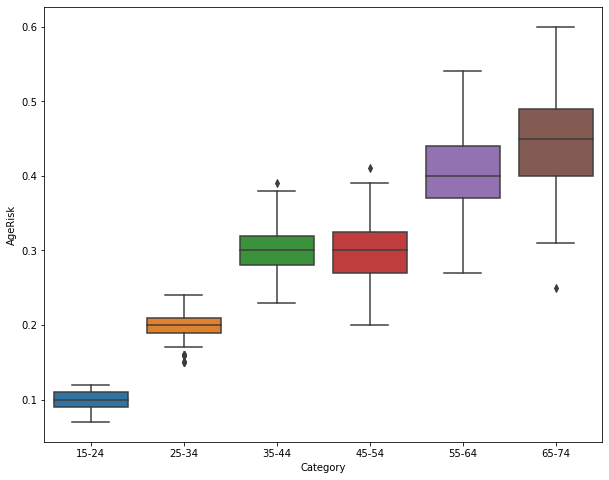

In [11]:
# Box plot is useful to see the relationship of increasing risk across the age categories. 
plt.figure(figsize=(10,8))
sns.boxplot(data=popdfage, x='Category', y='AgeRisk', order = order)

#### Risk 2 - *Smoking*

In [12]:
# This code section produces the risk profile for smokers using a combination of a binomial distribution and normal distribution. 
# The binomial distribution is used to indicate if an individual in the population is a smoker or not and allocates the risk level based on a normal distribution of 35% risk. 
def smk(popdf):
    if popdf['Age']>=15 and popdf['Age']<=24:return round(np.random.binomial(1,0.18)*np.random.normal(0.35, .1),2)
    elif popdf['Age']>24 and popdf['Age']<=34:return round(np.random.binomial(1,0.22)*np.random.normal(0.35, .1),2)
    elif popdf['Age']>34 and popdf['Age']<=44:return round(np.random.binomial(1,0.21)*np.random.normal(0.35, .1),2)
    elif popdf['Age']>44 and popdf['Age']<=54:return round(np.random.binomial(1,0.19)*np.random.normal(0.35, .1),2)
    elif popdf['Age']>54 and popdf['Age']<=64:return round(np.random.binomial(1,0.17)*np.random.normal(0.35, .1),2)
    elif popdf['Age']>64:return round(np.random.binomial(1,0.1)*np.random.normal(0.35, .1),2)
    else: return 0
popdf['Smoker']= popdf.apply(smk, axis=1)
popdfsmoke = popdf
#popdf.to_csv('./Datasets/smoker.csv')

In [13]:
popdfsmoke.groupby('Category')['Smoker'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
15-24,153.0,0.039085,0.111304,0.0,0.0,0.0,0.000,0.52
25-34,175.0,0.077714,0.152430,0.0,0.0,0.0,0.000,0.58
35-44,178.0,0.097416,0.175615,0.0,0.0,0.0,0.135,0.63
45-54,183.0,0.068142,0.150479,0.0,0.0,0.0,0.000,0.61
55-64,156.0,0.066731,0.144536,0.0,0.0,0.0,0.000,0.49
65-74,155.0,0.030000,0.095720,0.0,0.0,0.0,0.000,0.44


<AxesSubplot:xlabel='Category', ylabel='Smoker'>

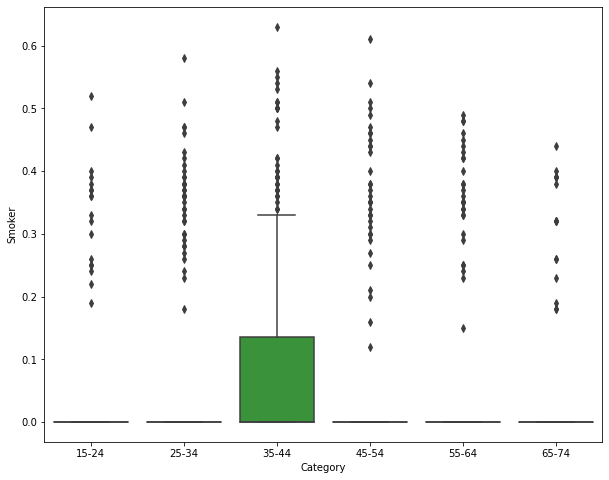

In [14]:
# The good news is that while individual smokers at any age are at risk, the general prevalence of smoking in the population is relatively low.  
plt.figure(figsize=(10,8))
sns.boxplot(data=popdfage, x='Category', y='Smoker', order = order)

#### Risk 3 - *Physical Activity (or lack of!)*

In [15]:
# This code section produces the risk levels for physical activity, categorised as Inactivity which is 1 - activity% for each age category. 
def inact(popdf):
    if popdf['Age']>=15 and popdf['Age']<=24:return round(np.random.normal(0.4, .1),2)
    elif popdf['Age']>24 and popdf['Age']<=34:return round(np.random.normal(0.45, .1),2)
    elif popdf['Age']>34 and popdf['Age']<=44:return round(np.random.normal(0.5, .2),2)
    elif popdf['Age']>44 and popdf['Age']<=54:return round(np.random.normal(0.55, .2),2)
    elif popdf['Age']>54 and popdf['Age']<=64:return round(np.random.normal(0.65, .3),2)
    elif popdf['Age']>64:return round(np.random.normal(0.7, .3),2)
    else: return 0
popdf['Inactive']= popdf.apply(inact, axis=1)
popdfactive = popdf

In [16]:
popdfactive.groupby('Category')['Inactive'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
15-24,153.0,0.398431,0.104744,0.01,0.3300,0.40,0.4700,0.64
25-34,175.0,0.438743,0.098264,0.20,0.3800,0.43,0.5000,0.67
35-44,178.0,0.524663,0.208164,-0.04,0.3800,0.53,0.6475,1.21
45-54,183.0,0.558470,0.199840,0.01,0.4350,0.55,0.6800,1.04
55-64,156.0,0.670192,0.289289,-0.28,0.4775,0.65,0.8800,1.45
65-74,155.0,0.701677,0.346264,-0.27,0.4900,0.69,0.9400,1.51


<AxesSubplot:xlabel='Category', ylabel='Inactive'>

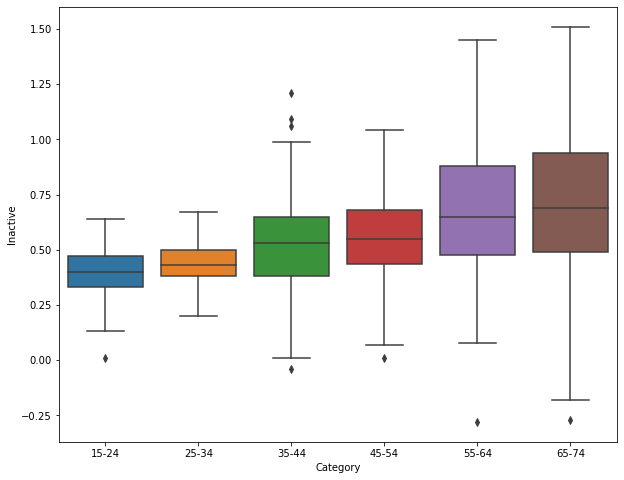

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(data=popdfage, x='Category', y='Inactive', order = order)

#### Risk - 4.1 Weight - Normal

In [18]:
# This code section produces the risk factor for those classified as Normal Weight. 
def normwt(popdf):
    if popdf['Age']>=15 and popdf['Age']<=24:return round(np.random.binomial(1,0.65)*np.random.normal(.15, .025),2)
    elif popdf['Age']>24 and popdf['Age']<=34:return round(np.random.binomial(1,0.4)*np.random.normal(.15, .025),2)
    elif popdf['Age']>34 and popdf['Age']<=44:return round(np.random.binomial(1,0.4)*np.random.normal(.125, .025),2)
    elif popdf['Age']>44 and popdf['Age']<=54:return round(np.random.binomial(1,0.3)*np.random.normal(.125, .025),2)
    elif popdf['Age']>54 and popdf['Age']<=64:return round(np.random.binomial(1,0.25)*np.random.normal(.10, .025),2)
    elif popdf['Age']>64:return round(np.random.binomial(1,0.25)*np.random.normal(.10, .025),2)
    else: return 0
popdf['NormWeight']= popdf.apply(normwt, axis=1)
popdfnormwt = popdf

In [19]:
popdfnormwt.groupby('Category')['NormWeight'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
15-24,153.0,0.101111,0.071695,0.0,0.0,0.13,0.160,0.20
25-34,175.0,0.066800,0.077896,0.0,0.0,0.00,0.150,0.22
35-44,178.0,0.050112,0.063219,0.0,0.0,0.00,0.120,0.18
45-54,183.0,0.040328,0.060209,0.0,0.0,0.00,0.105,0.18
55-64,156.0,0.020769,0.043885,0.0,0.0,0.00,0.000,0.16
65-74,155.0,0.025613,0.046669,0.0,0.0,0.00,0.000,0.16


<AxesSubplot:xlabel='Category', ylabel='NormWeight'>

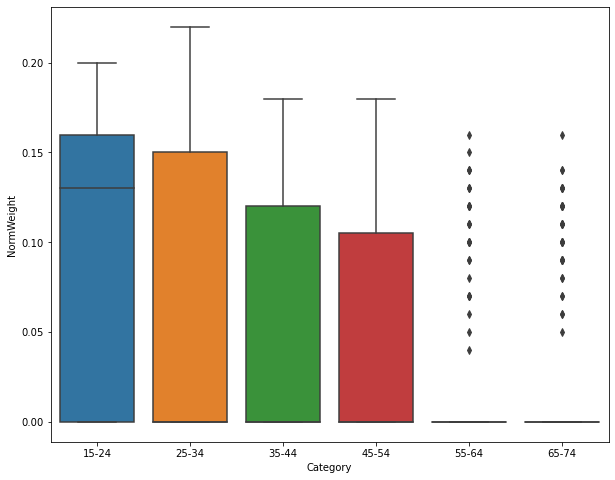

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(data=popdfage, x='Category', y='NormWeight', order = order)

#### Risk 4.2 - Weight - Overweight

In [21]:
# This code section produces the risk factor for those classified as OverWeight. 
def overwt(popdf):
    if popdf['NormWeight']>0:return 0
    if popdf['Age']>=15 and popdf['Age']<=24:return round(np.random.binomial(1,0.20)*np.random.normal(.3, .025),2)
    elif popdf['Age']>24 and popdf['Age']<=34:return round(np.random.binomial(1,0.35)*np.random.normal(.3, .025),2)
    elif popdf['Age']>34 and popdf['Age']<=44:return round(np.random.binomial(1,0.40)*np.random.normal(.25, .025),2)
    elif popdf['Age']>44 and popdf['Age']<=54:return round(np.random.binomial(1,0.45)*np.random.normal(.25, .025),2)
    elif popdf['Age']>54 and popdf['Age']<=64:return round(np.random.binomial(1,0.45)*np.random.normal(.15, .025),2)
    elif popdf['Age']>64:return round(np.random.binomial(1,0.4)*np.random.normal(.15, .025),2)
    else: return 0
popdf['OverWeight']= popdf.apply(overwt, axis=1)
popdfovwt = popdf

In [22]:
popdfovwt.groupby('Category')['OverWeight'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
15-24,153.0,0.030784,0.093784,0.0,0.0,0.0,0.000,0.34
25-34,175.0,0.066629,0.127327,0.0,0.0,0.0,0.000,0.36
35-44,178.0,0.046461,0.096769,0.0,0.0,0.0,0.000,0.30
45-54,183.0,0.072240,0.112777,0.0,0.0,0.0,0.220,0.30
55-64,156.0,0.052308,0.071336,0.0,0.0,0.0,0.130,0.20
65-74,155.0,0.040452,0.068065,0.0,0.0,0.0,0.095,0.21


<AxesSubplot:xlabel='Category', ylabel='OverWeight'>

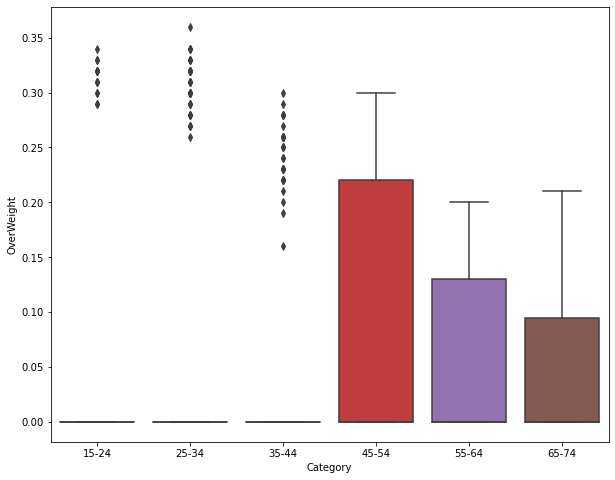

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(data=popdfage, x='Category', y='OverWeight', order = order)

#### Risk 4.3 - Weight - Obese

In [24]:
# This code section produces the risk factor for those classified as Obese. 
def obswt(popdf):
    if popdf['OverWeight']>0 or popdf['NormWeight']>0:return 0
    elif popdf['Age']>=15 and popdf['Age']<=24:return round(np.random.binomial(1,0.10)*np.random.normal(.5, .025),2)
    elif popdf['Age']>24 and popdf['Age']<=34:return round(np.random.binomial(1,0.20)*np.random.normal(.5, .025),2)
    elif popdf['Age']>34 and popdf['Age']<=44:return round(np.random.binomial(1,0.20)*np.random.normal(.45, .025),2)
    elif popdf['Age']>44 and popdf['Age']<=54:return round(np.random.binomial(1,0.25)*np.random.normal(.45, .025),2)
    elif popdf['Age']>54 and popdf['Age']<=64:return round(np.random.binomial(1,0.30)*np.random.normal(.25, .025),2)
    elif popdf['Age']>64:return round(np.random.binomial(1,0.35)*np.random.normal(.25, .025),2)
    else: return 0
popdf['Obese']= popdf.apply(obswt, axis=1)
popdfobs = popdf

In [25]:
popdfobs.groupby('Category')['Obese'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
15-24,153.0,0.006732,0.058757,0.0,0.0,0.0,0.0,0.54
25-34,175.0,0.051314,0.152229,0.0,0.0,0.0,0.0,0.56
35-44,178.0,0.021404,0.093318,0.0,0.0,0.0,0.0,0.47
45-54,183.0,0.044317,0.134787,0.0,0.0,0.0,0.0,0.50
55-64,156.0,0.040064,0.092579,0.0,0.0,0.0,0.0,0.31
65-74,155.0,0.043613,0.095875,0.0,0.0,0.0,0.0,0.30


<AxesSubplot:xlabel='Category', ylabel='Obese'>

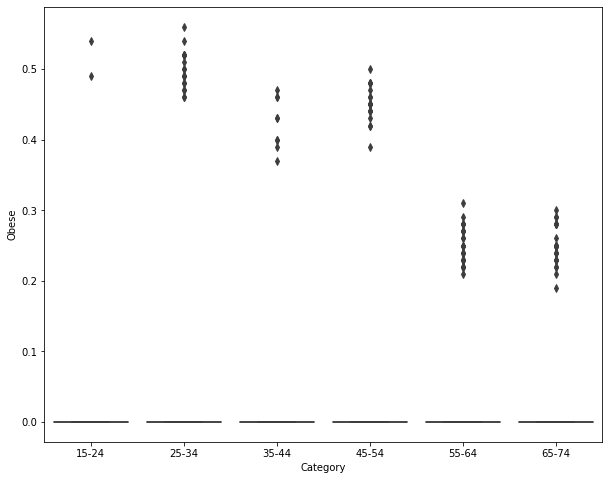

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(data=popdfage, x='Category', y='Obese', order = order)

#### Overall Risk Profile

In [27]:
# Put all together to finalise the dataset and total risk. 
cols=['AgeRisk','Smoker','Inactive','NormWeight','OverWeight','Obese']
popdf['TotalRisk'] = popdf[cols].sum(axis=1)
popdfTotal = popdf[['Category', 'AgeRisk', 'Smoker', 'Inactive', 'NormWeight', 'OverWeight', 'Obese', 'TotalRisk']]
popdfTotal

,Category,AgeRisk,Smoker,Inactive,NormWeight,OverWeight,Obese,TotalRisk
0,45-54,0.34,0.61,0.45,0.10,0.00,0.00,1.50
1,55-64,0.32,0.00,0.21,0.00,0.14,0.00,0.67
2,25-34,0.20,0.00,0.40,0.00,0.00,0.56,1.16
3,15-24,0.11,0.00,0.39,0.14,0.00,0.00,0.64
4,15-24,0.10,0.00,0.49,0.18,0.00,0.00,0.77
...,...,...,...,...,...,...,...,...
995,55-64,0.40,0.00,0.45,0.07,0.00,0.00,0.92
996,55-64,0.40,0.00,0.69,0.00,0.00,0.00,1.09
997,35-44,0.30,0.00,0.43,0.11,0.00,0.00,0.84
998,45-54,0.26,0.36,0.94,0.00,0.00,0.00,1.56


In [28]:
# Summarise the Total Risk by age category. 
popdfTotal.groupby('Category')['TotalRisk'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
15-24,153.0,0.676013,0.171462,0.25,0.5600,0.67,0.7500,1.20
25-34,175.0,0.898914,0.230598,0.45,0.7200,0.90,1.0400,1.70
35-44,178.0,1.042022,0.318605,0.25,0.8025,1.03,1.2450,1.92
45-54,183.0,1.082842,0.278766,0.28,0.8700,1.09,1.2500,1.84
55-64,156.0,1.252692,0.326894,0.55,1.0300,1.27,1.4725,2.07
65-74,155.0,1.289935,0.366359,0.15,1.0400,1.29,1.5400,2.13


In [29]:
# Write the final file to the output file in the Datasets folder. 
popdfTotal.to_csv('./Datasets/RiskDataFinal.csv')

### Conclusion

While Covid makes all the headlines Diabetes continues its march across society, exacerabated by relentless upwards trends in obesity and inactivity across all age groups, the only positive trend being that of smoking. It remains to be seen how Covid has added to this but it is highly unlikley to be positive. While I have barely touched on the available research and data in relation to the primary risk factors for developing the condition the message is very clear and consistent - inactivity and excess weight lead to a high likelihood of developing diabetes. Looking at the data produced in this simulation across the whole population of 1000 individuals there is a tripling of risk between the median in the 15-24 age group and that of the 55 - 74 age groups. Someone in the older age groups who is an overweight, inactive smoker is up to 30 times more likely to develop diabetes than someone who is an active, normal weight, non smoker.

However, unlike age these factors, including smoking, are modifiable risk factors, i.e. they can be controlled and managed at the individual level. And here the message is also clear and consistent, managing these modifiable risk factors can reduce risks and can also improve health outcomes for those who have already developed the condition. 

### References

https://www.diabetes.ie/about-us/what-is-diabetes/

https://care.diabetesjournals.org/content/41/5/963

https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444

https://www.diabetesresearchclinicalpractice.com/article/S0168-8227(20)30138-8/fulltext

https://en.wikipedia.org/wiki/Diabetes

https://www.diabetes.ie/risk-factors/

https://www.fda.gov/tobacco-products/health-effects-tobacco-use/cigarette-smoking-risk-factor-type-2-diabetes

https://www.cso.ie/en/releasesandpublications/ep/p-pme/populationandmigrationestimatesapril2021/mainresults/

https://pubmed.ncbi.nlm.nih.gov/26575606/

https://www.cdc.gov/obesity/adult/defining.html

https://dmsjournal.biomedcentral.com/articles/10.1186/1758-5996-6-50

https://care.diabetesjournals.org/content/30/6/1562

https://www.irishexaminer.com/news/arid-40343039.html

https://ec.europa.eu/eurostat/web/microdata/european-health-interview-survey

https://www.webmd.com/diabetes/features/do-thin-people-get-diabetes

https://care.diabetesjournals.org/content/30/6/1562

https://www2.hse.ie/wellbeing/being-active-with-a-health-condition/diabetes-and-physical-activity.html

https://care.diabetesjournals.org/content/39/11/2065

https://www.health.harvard.edu/staying-healthy/the-importance-of-exercise-when-you-have-diabetes

https://remotecoach.fit/physical-inactivity-how-not-moving-is-killing-us/?gclid=Cj0KCQiAzMGNBhCyARIsANpUkzNZVxGlFX8wPx49Ija-MoIxDfkr49N6lH3dmcnFC2gX993Thaa2gxcaAqllEALw_wcB

https://journals.humankinetics.com/view/journals/jpah/13/s2/article-pS183.xml

https://academic.oup.com/biomedgerontology/article/73/11/1538/4807398?login=true

https://www.cdc.gov/tobacco/campaign/tips/diseases/diabetes.html

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3530709/

https://dmsjournal.biomedcentral.com/articles/10.1186/s13098-019-0482-2

https://www.webmd.com/diabetes/smoking-and-diabetes

https://publicpolicy.ie/papers/trends-in-smoking-prevalence-and-tobacco-consumption/